# Final Project: Medha Karthik

### Necessary imports

In [1]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt # for making visualizations

import re as re # for filtering data
from sklearn.feature_extraction.text import TfidfVectorizer # for adjusting words
from sklearn.metrics.pairwise import linear_kernel # for making the similarity matrix

pd.set_option('display.max_colwidth', None) # to show all information in columns

### Import dataset using pandas

In [2]:
df = pd.read_csv("romance_books.csv")# load in your data

### View dataset

In [3]:
df.head()

,title,author,release_year,audience,genre,book_length,rating,number_of_ratings,read,Unnamed: 9
0,10 Blind Dates,Ashley Elston,2019,Adult,Young Adult Fantasy,336 pages,4.02,20195,NaN,NaN
1,99 Percent Mine,Sally Thorne,2019,Adult,Romantic Comedy,368 pages,3.39,69346,NaN,NaN
2,"A Beautiful Wedding (Beautiful, #2.5)",Jamie McGuire,2013,Adult,New Adult Contemporary,160 pages,3.99,62556,NaN,NaN
3,A Bend in the Road,Nicholas Sparks,2001,Adult,Contemporary Fiction,294 pages,4.03,147169,NaN,NaN
4,"A Breath of Snow and Ashes (Outlander, #6)",Diana Gabaldon,2005,Adult,Historical Fiction,980 pages,4.43,163691,NaN,NaN


In [4]:
df.describe

<bound method NDFrame.describe of                                                   title           author  \
0                                        10 Blind Dates    Ashley Elston   
1                                      99 Percent Mine     Sally  Thorne   
2                 A Beautiful Wedding (Beautiful, #2.5)    Jamie McGuire   
3                                   A Bend in the Road   Nicholas Sparks   
4            A Breath of Snow and Ashes (Outlander, #6)   Diana Gabaldon   
...                                                 ...              ...   
1242           You Had Me at Hola (Primas of Power, #1)     Alexis Daria   
1243  You Made a Fool of Death with Your Beauty (Har...    Akwaeke Emezi   
1244           You Should See Me in a Crown (Hardcover)    Leah  Johnson   
1245           You Should See Me in a Crown (Hardcover)    Leah  Johnson   
1246                     You've Reached Sam (Hardcover)      Dustin Thao   

      release_year     audience                    ge

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   author             1247 non-null   object 
 2   release_year       1247 non-null   int64  
 3   audience           1247 non-null   object 
 4   genre              1247 non-null   object 
 5   book_length        1245 non-null   object 
 6   rating             1247 non-null   float64
 7   number_of_ratings  1247 non-null   int64  
 8   read               175 non-null    object 
 9   Unnamed: 9         1 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 97.6+ KB


In [6]:
df.shape

(1247, 10)

### Data preprocessing

#### 1. Remove null values: 

In [7]:
df.isna().sum() #check for nulls by column

title                   0
author                  0
release_year            0
audience                0
genre                   0
book_length             2
rating                  0
number_of_ratings       0
read                 1072
Unnamed: 9           1246
dtype: int64

There are no null values in the important columns. The 'read' column was for personal distinction and plays no role in the model.

#### 2. Remove duplicated data

In [8]:
df.drop_duplicates(subset=['title'], inplace=True) # drop duplicated values
df.reset_index(drop=True, inplace=True) #reset the index

In [9]:
df.shape

(1232, 10)

Duplicated titles were dropped. 1232 books remain

#### 3. Remove unnecessary features

In [10]:
df.columns

Index(['title', 'author', 'release_year', 'audience', 'genre', 'book_length',
       'rating', 'number_of_ratings', 'read', 'Unnamed: 9'],
      dtype='object')

In [11]:
df = df.drop(columns = ['Unnamed: 9', 'read'])

#### 4. Adjust values in 'pages', 'title', and 'genre'

In [12]:
# keep only numbers in the book_length column (remove 'pages' from each entry)
def extract_numbers(text):
    numbers = re.findall(r'\d+', str(text))  # \d+ matches one or more digits
    return ''.join(numbers)

# apply the function to 'book_length' column, renamed as pages
df['pages'] = df['book_length'].apply(extract_numbers)

df = df.drop(columns = ['book_length']) # remove original book_length column
df.head() # show dataframe

,title,author,release_year,audience,genre,rating,number_of_ratings,pages
0,10 Blind Dates,Ashley Elston,2019,Adult,Young Adult Fantasy,4.02,20195,336
1,99 Percent Mine,Sally Thorne,2019,Adult,Romantic Comedy,3.39,69346,368
2,"A Beautiful Wedding (Beautiful, #2.5)",Jamie McGuire,2013,Adult,New Adult Contemporary,3.99,62556,160
3,A Bend in the Road,Nicholas Sparks,2001,Adult,Contemporary Fiction,4.03,147169,294
4,"A Breath of Snow and Ashes (Outlander, #6)",Diana Gabaldon,2005,Adult,Historical Fiction,4.43,163691,980


In [13]:
# remove all information in parentheses in the title
def remove_parentheses(text): 
    words = re.sub(r' \([^)]*\)', '', text) 
    return words

# apply the function to 'title' column, renamed as adjusted_title 
df['adjusted_title'] = df['title'].apply(remove_parentheses)

# show dataframe
df.head()

,title,author,release_year,audience,genre,rating,number_of_ratings,pages,adjusted_title
0,10 Blind Dates,Ashley Elston,2019,Adult,Young Adult Fantasy,4.02,20195,336,10 Blind Dates
1,99 Percent Mine,Sally Thorne,2019,Adult,Romantic Comedy,3.39,69346,368,99 Percent Mine
2,"A Beautiful Wedding (Beautiful, #2.5)",Jamie McGuire,2013,Adult,New Adult Contemporary,3.99,62556,160,A Beautiful Wedding
3,A Bend in the Road,Nicholas Sparks,2001,Adult,Contemporary Fiction,4.03,147169,294,A Bend in the Road
4,"A Breath of Snow and Ashes (Outlander, #6)",Diana Gabaldon,2005,Adult,Historical Fiction,4.43,163691,980,A Breath of Snow and Ashes


Some of the entries in the 'genre' column include numbers. This is an error in the dataset that is removed in this step:

In [14]:
# remove any numbers from the genre column:
df['genre'] = df['genre'].str.replace(r'[^a-zA-Z\s]', '')

# show dataframe
df.head()

C:\Users\Medha K\AppData\Local\Temp\ipykernel_83452\3490296810.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genre'] = df['genre'].str.replace(r'[^a-zA-Z\s]', '')


,title,author,release_year,audience,genre,rating,number_of_ratings,pages,adjusted_title
0,10 Blind Dates,Ashley Elston,2019,Adult,Young Adult Fantasy,4.02,20195,336,10 Blind Dates
1,99 Percent Mine,Sally Thorne,2019,Adult,Romantic Comedy,3.39,69346,368,99 Percent Mine
2,"A Beautiful Wedding (Beautiful, #2.5)",Jamie McGuire,2013,Adult,New Adult Contemporary,3.99,62556,160,A Beautiful Wedding
3,A Bend in the Road,Nicholas Sparks,2001,Adult,Contemporary Fiction,4.03,147169,294,A Bend in the Road
4,"A Breath of Snow and Ashes (Outlander, #6)",Diana Gabaldon,2005,Adult,Historical Fiction,4.43,163691,980,A Breath of Snow and Ashes


In [15]:
df.shape

(1232, 9)

#### 4. Remove ending whitespace in relevant columns

In [16]:
df['genre'] = df['genre'].str.rstrip()
df['audience'] = df['audience'].str.rstrip()
df['author'] = df['author'].str.rstrip()

### Visualizations

Years:

<Axes: xlabel='release_year', ylabel='count'>

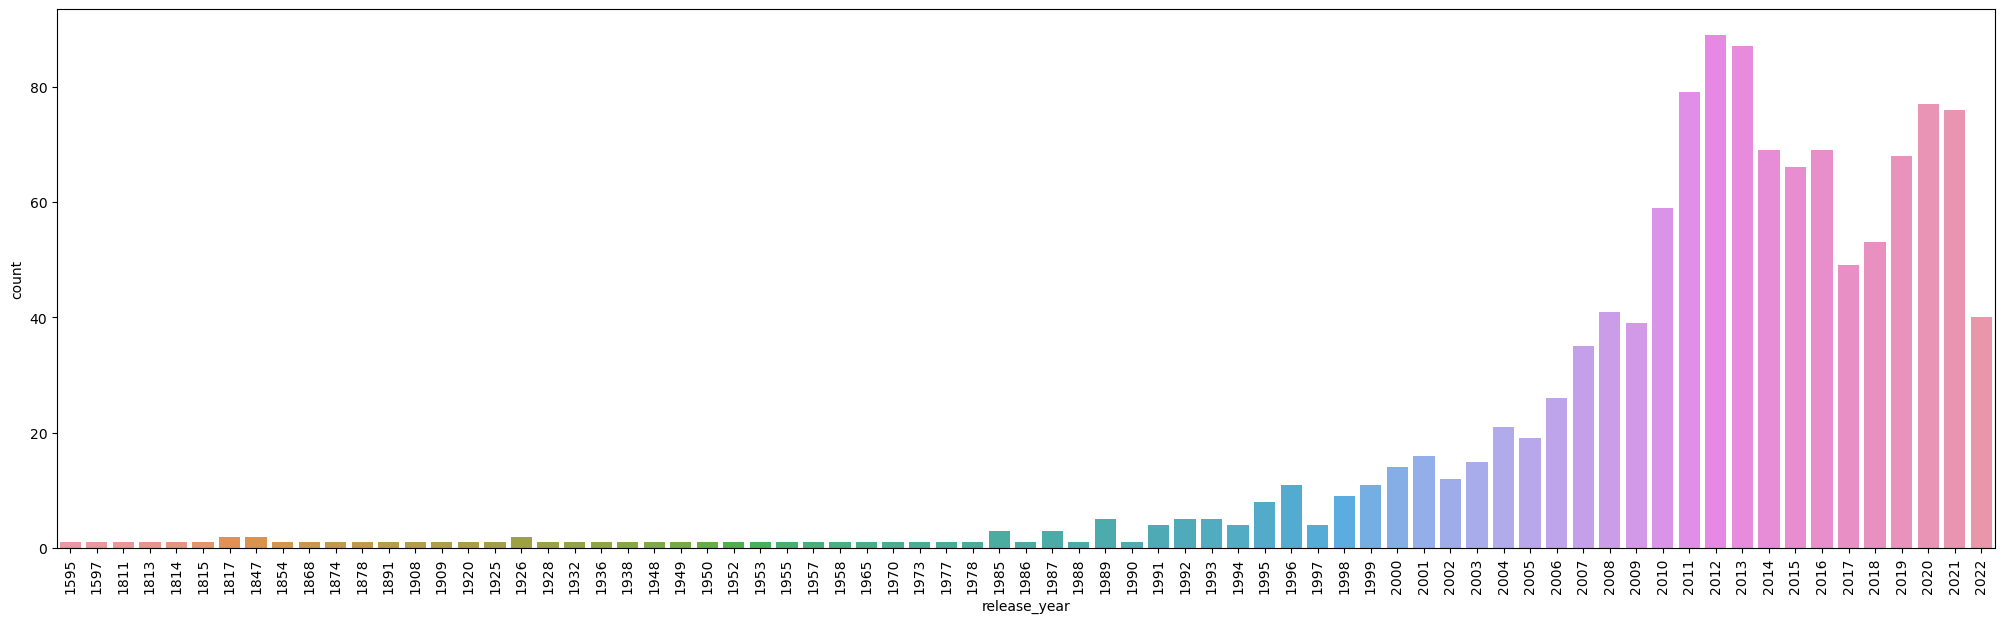

In [17]:
plt.figure(figsize=(25,7))
plt.xticks(rotation='vertical')
sns.countplot(data = df,x = "release_year")

Audience:

<Axes: xlabel='audience', ylabel='count'>

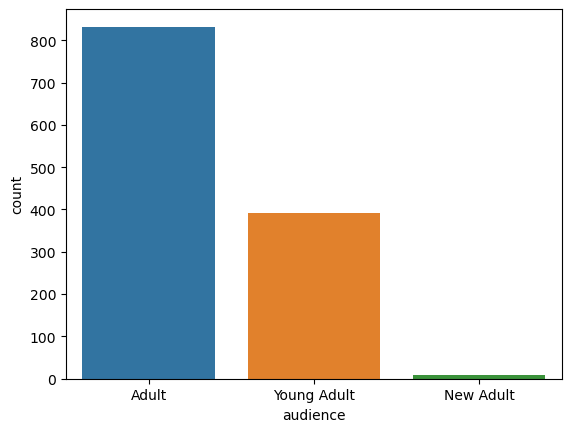

In [18]:
sns.countplot(data = df,x = "audience")

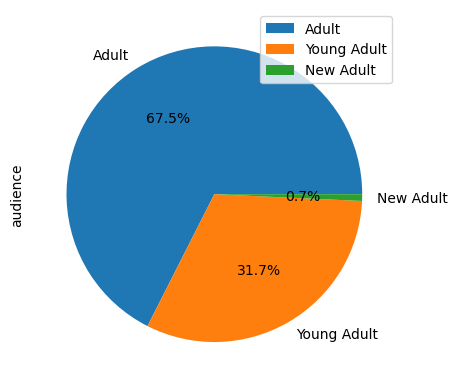

In [19]:
df['audience'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.legend()
plt.show()

In [20]:
df['audience'].value_counts()

Adult          832
Young Adult    391
New Adult        9
Name: audience, dtype: int64

Genres:

<Axes: xlabel='genre', ylabel='count'>

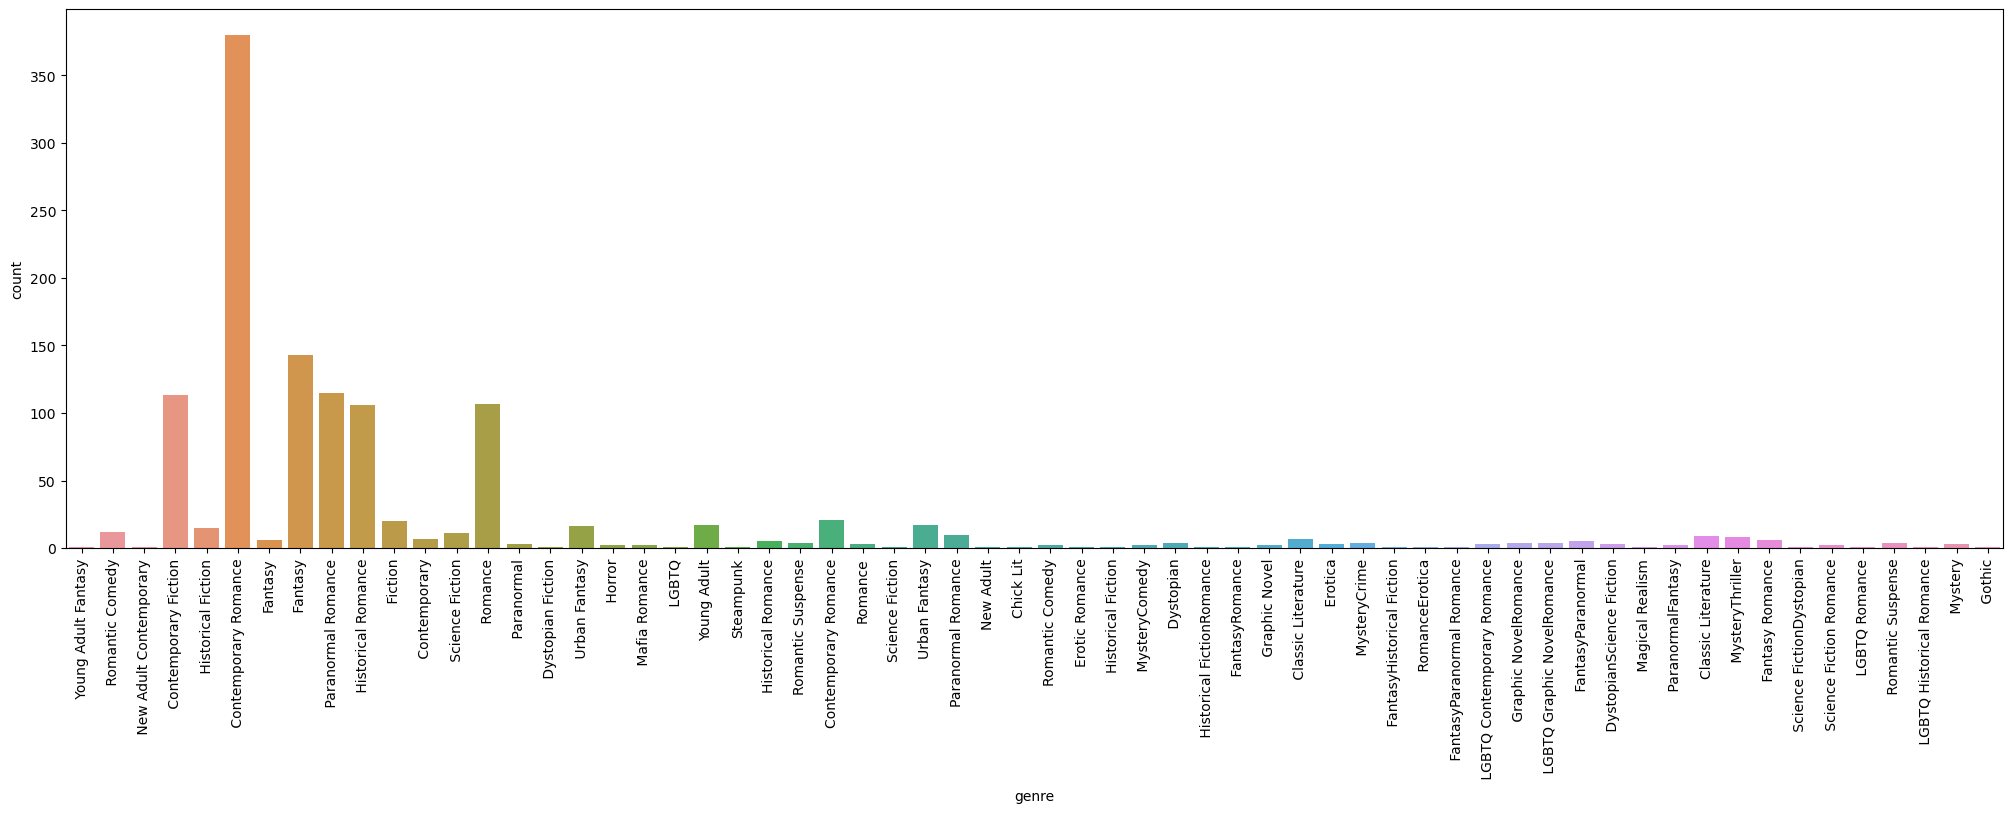

In [21]:
plt.figure(figsize=(25,7))
plt.xticks(rotation='vertical')
sns.countplot(data = df,x = "genre")

Ratings:

<Axes: xlabel='rating', ylabel='count'>

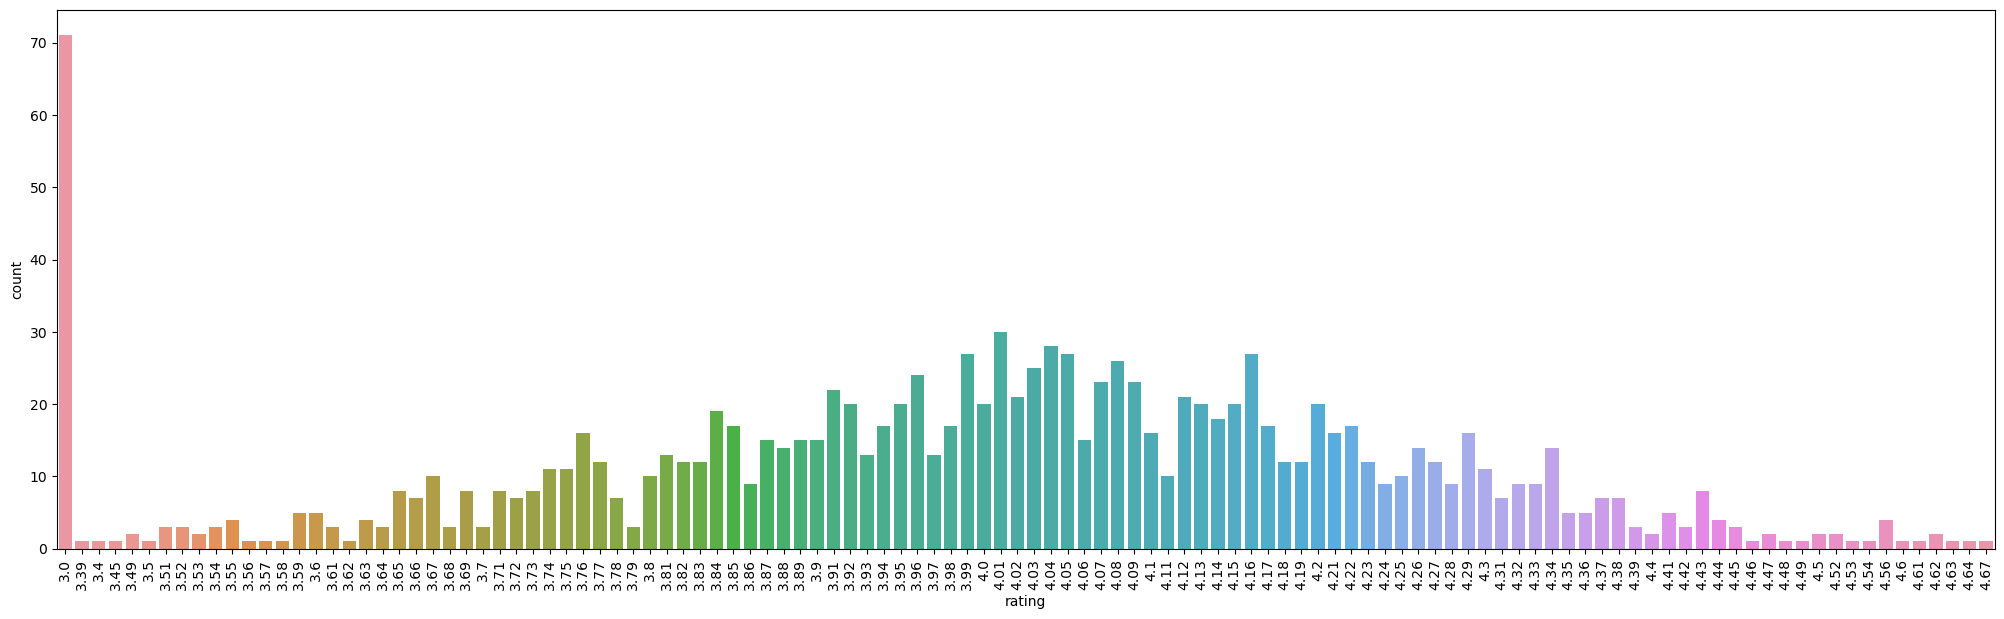

In [22]:
plt.figure(figsize=(25,7))
plt.xticks(rotation='vertical')
sns.countplot(data = df,x = "rating")

### Modeling

In [26]:
# make a new df with the chosen features
content_df = df[['adjusted_title', 'author', 'release_year', 
                   'audience', 'genre', 'rating','number_of_ratings','pages']]

# join all information in one column (as strings)
content_df['Content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# use TF-IDF vectorizer to convert content into a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
content_matrix = tfidf_vectorizer.fit_transform(content_df['Content'])

# cosine similarity matrix
content_similarity = linear_kernel(content_matrix, content_matrix)

In [27]:
#book recommendation function
def get_recommendations():
    
    # get user input for the title
    title = input("Enter a book title: ")
    top_n = input("Enter how many recommendations you would like: ")
    top_n = int(top_n) #convert to integer
    
    index = content_df[content_df['adjusted_title'] == title].index[0] # find index
    similarity_scores = content_similarity[index] # find similarity scores
    top_similarities = similarity_scores.argsort()[::-1][1:top_n + 1]
    
    # find recommendations 
    recommendations = df.loc[top_similarities, 'adjusted_title'].values
    authors = df.loc[top_similarities, 'author'].values 
    
    # print recommendations, authors, and similarity scores 
    i = 0
    while(i < top_n):
        print(i+1,".",recommendations[i], "by", authors[i], ", similarity = ", similarity_scores[i])
        i = i + 1

In [30]:
#call recommendation function!
get_recommendations()

Enter a book title: 10 Blind Dates
Enter how many recommendations you would like: 10
1 . The Proposition by Katie Ashley , similarity =  0.9999999999999999
2 . Breathe by Kristen Ashley , similarity =  0.045069772009528816
3 . Ravished by Amanda Quick , similarity =  0.011284379959761889
4 . The Wedding Party by Jasmine Guillory , similarity =  0.005630212209520558
5 . Ruin and Rising by Leigh Bardugo , similarity =  0.004999049059181171
6 . Love Unscripted by Tina Reber , similarity =  0.005367843491549479
7 . Royal Holiday by Jasmine Guillory , similarity =  0.04168419336124113
8 . Things You Save in a Fire by Katherine Center , similarity =  0.03765149471784258
9 . Never Never by Colleen Hoover , similarity =  0.039209688522996486
10 . Own the Wind by Kristen Ashley , similarity =  0.028308460862558036


In [42]:
content_df[content_df['adjusted_title'] == '10 Blind Dates'].Content

0    10 Blind Dates Ashley Elston 2019 Adult  Young Adult Fantasy 4.02 20195 336
Name: Content, dtype: object

In [43]:
content_df[content_df['adjusted_title'] == 'The Proposition'].Content

1014    The Proposition Katie Ashley 2012 Young Adult  Fantasy 4.02 50566 308
Name: Content, dtype: object